In [1]:
import openeo

Open a new openeo session:

In [2]:
session = openeo.connect("https://openeo.vito.be/openeo/1.0.0")
openeo_user= 'hande'
openeo_pass= 'hande123'

session.authenticate_basic(openeo_user, openeo_pass)

<Connection to 'https://openeo.vito.be/openeo/1.0.0' with BearerAuth>

Retieve sentinel_2 data cube for B02, B04 and B08 bands on 6 May 2018. Notice how we don't have to download any images for this. OpenEO creates the datacube on the fly. 

In [3]:
sentinel2_data_cube = session.imagecollection("TERRASCOPE_S2_TOC_V2", temporal_extent=["2018-05-06","2018-05-06"], bands=["TOC-B02_10M","TOC-B04_10M","TOC-B08_10M"])

Now, let's slice the datacube further by limiting it to a boundry box.

In [4]:
sentinel2_data_cube = sentinel2_data_cube.filter_bbox(west=5.15183687210083,east=5.153381824493408,south=51.18192559252128,north=51.18469636040683,crs="EPSG:4326")

We can now extract the bands and do mathematical operations on them:

In [5]:
B02 = sentinel2_data_cube.band('TOC-B02_10M')
B04 = sentinel2_data_cube.band('TOC-B04_10M')
B08 = sentinel2_data_cube.band('TOC-B08_10M')

evi_cube = (2.5 * (B08 - B04)) / ((B08 + 6.0 * B04 - 7.5 * B02) + 1.0)

The result can be downloaded as follows:

In [ ]:
evi_cube.download("out.geotiff",format="GTiff")

You can visualize the output as follows:

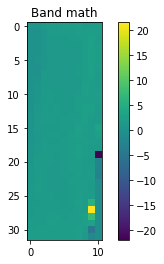

In [10]:
import rasterio
from matplotlib import pyplot as plt

with rasterio.open('out.geotiff', 'r') as ds:
    img = ds.read()  

plt.title("Band math")
plt.imshow(img[0])  
plt.colorbar()
plt.show()